# Direct Preference Optimization (DPO)

**Direct Preference Optimization (DPO)** is a method in Reinforcement Learning from Human Feedback (RLHF) that directly optimizes a model to match human preferences.  

Given a dataset of **pairwise preferences**:

$$
\mathcal{D} = \{ (x_i^+, x_i^-) \}_{i=1}^N
$$

Where:

- $x_i^+$: preferred sample  
- $x_i^-$: non-preferred sample  

The goal is to learn a **policy $\pi_\theta$** that **maximizes the probability of preferred samples**:

$$
\mathcal{L}(\theta) = - \sum_{i=1}^N \log \frac{\pi_\theta(x_i^+)}{\pi_\theta(x_i^+) + \pi_\theta(x_i^-)}
$$

- This is a **pairwise cross-entropy loss** formulation for preference modeling.


## 1. Probability of Preference

We define the probability that the model prefers $x^+$ over $x^-$ as a **softmax over outputs**:

$$
P_\theta(x^+ \succ x^-) = \frac{\pi_\theta(x^+)}{\pi_\theta(x^+) + \pi_\theta(x^-)}
$$

The **loss function** is then:

$$
\mathcal{L}(\theta) = - \sum_{i=1}^N \log P_\theta(x_i^+ \succ x_i^-)
$$

---

## 2. Gradient of the Loss

The gradient w.r.t. the model parameters $\theta$:

$$
\nabla_\theta \mathcal{L}(\theta) = - \sum_{i=1}^N \frac{1}{P_\theta(x_i^+ \succ x_i^-)} \nabla_\theta P_\theta(x_i^+ \succ x_i^-)
$$

Where:

$$
\nabla_\theta P_\theta(x^+ \succ x^-) = \frac{\nabla_\theta \pi_\theta(x^+) (\pi_\theta(x^+) + \pi_\theta(x^-)) - \pi_\theta(x^+) (\nabla_\theta \pi_\theta(x^+) + \nabla_\theta \pi_\theta(x^-))}{(\pi_\theta(x^+) + \pi_\theta(x^-))^2}
$$


## 1. Probability of Preference

We define the probability that the model prefers $x^+$ over $x^-$ as a **softmax over outputs**:

$$
P_\theta(x^+ \succ x^-) = \frac{\pi_\theta(x^+)}{\pi_\theta(x^+) + \pi_\theta(x^-)}
$$

The **loss function** is then:

$$
\mathcal{L}(\theta) = - \sum_{i=1}^N \log P_\theta(x_i^+ \succ x_i^-)
$$

---

## 2. Gradient of the Loss

The gradient w.r.t. the model parameters $\theta$:

$$
\nabla_\theta \mathcal{L}(\theta) = - \sum_{i=1}^N \frac{1}{P_\theta(x_i^+ \succ x_i^-)} \nabla_\theta P_\theta(x_i^+ \succ x_i^-)
$$

Where:

$$
\nabla_\theta P_\theta(x^+ \succ x^-) = \frac{\nabla_\theta \pi_\theta(x^+) (\pi_\theta(x^+) + \pi_\theta(x^-)) - \pi_\theta(x^+) (\nabla_\theta \pi_\theta(x^+) + \nabla_\theta \pi_\theta(x^-))}{(\pi_\theta(x^+) + \pi_\theta(x^-))^2}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Toy MNIST "trajectories" (sequence of 10 pixels)
x_positive = np.random.rand(10)
x_negative = np.random.rand(10)

# Initialize model parameters for DPO (linear model)
theta = np.zeros(10)
learning_rate = 0.1
epochs = 50
loss_history = []


We define a **linear model** for probability:

$$
\pi_\theta(x) = \exp(\theta^\top x)
$$

The **preference probability**:

$$
P_\theta(x^+ \succ x^-) = \frac{\pi_\theta(x^+)}{\pi_\theta(x^+) + \pi_\theta(x^-)}
$$

We perform gradient descent on the **negative log-likelihood**:

$$
\mathcal{L}(\theta) = - \log P_\theta(x^+ \succ x^-)
$$


In [2]:
for ep in range(epochs):
    # Compute model outputs
    pi_pos = np.exp(np.dot(theta, x_positive))
    pi_neg = np.exp(np.dot(theta, x_negative))

    # Compute preference probability
    p_pref = pi_pos / (pi_pos + pi_neg)

    # Compute loss (negative log-likelihood)
    loss = -np.log(p_pref)
    loss_history.append(loss)

    # Gradient of the preference probability
    grad = (1 - p_pref) * x_positive - (1 - p_pref) * x_negative

    # Update parameters
    theta -= learning_rate * grad

    print(f"Epoch {ep+1}: Loss = {loss:.4f}, Preference Probability = {p_pref:.4f}")


Epoch 1: Loss = 0.6931, Preference Probability = 0.5000
Epoch 2: Loss = 0.7099, Preference Probability = 0.4917
Epoch 3: Loss = 0.7273, Preference Probability = 0.4832
Epoch 4: Loss = 0.7452, Preference Probability = 0.4746
Epoch 5: Loss = 0.7638, Preference Probability = 0.4659
Epoch 6: Loss = 0.7829, Preference Probability = 0.4571
Epoch 7: Loss = 0.8027, Preference Probability = 0.4481
Epoch 8: Loss = 0.8231, Preference Probability = 0.4390
Epoch 9: Loss = 0.8443, Preference Probability = 0.4299
Epoch 10: Loss = 0.8661, Preference Probability = 0.4206
Epoch 11: Loss = 0.8886, Preference Probability = 0.4112
Epoch 12: Loss = 0.9119, Preference Probability = 0.4018
Epoch 13: Loss = 0.9359, Preference Probability = 0.3922
Epoch 14: Loss = 0.9607, Preference Probability = 0.3826
Epoch 15: Loss = 0.9863, Preference Probability = 0.3730
Epoch 16: Loss = 1.0127, Preference Probability = 0.3632
Epoch 17: Loss = 1.0399, Preference Probability = 0.3535
Epoch 18: Loss = 1.0679, Preference Prob

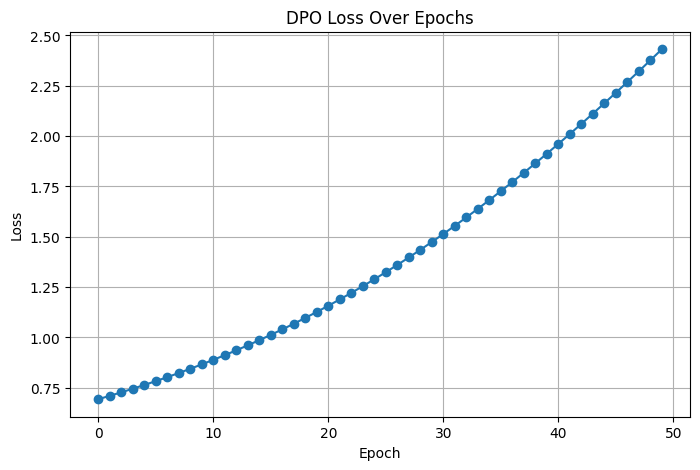

In [3]:
plt.figure(figsize=(8,5))
plt.plot(loss_history, marker='o')
plt.title("DPO Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()


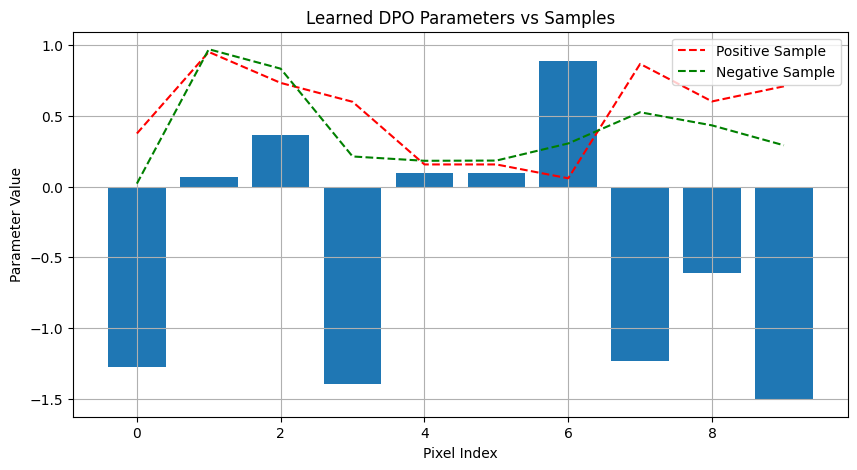

In [4]:
plt.figure(figsize=(10,5))
plt.bar(range(len(theta)), theta)
plt.plot(range(len(x_positive)), x_positive, 'r--', label='Positive Sample')
plt.plot(range(len(x_negative)), x_negative, 'g--', label='Negative Sample')
plt.title("Learned DPO Parameters vs Samples")
plt.xlabel("Pixel Index")
plt.ylabel("Parameter Value")
plt.legend()
plt.grid()
plt.show()


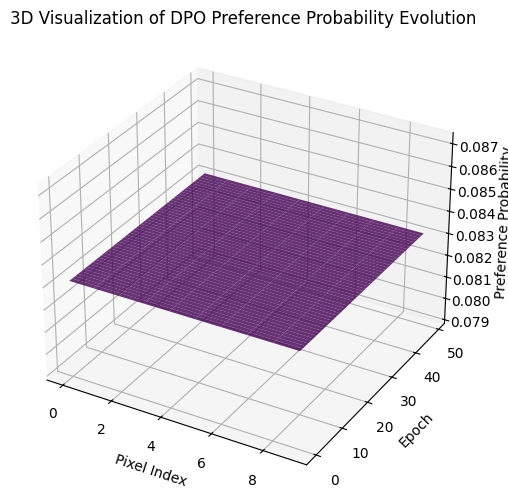

In [5]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(np.arange(10), np.arange(epochs))
Z = np.tile([np.exp(np.dot(theta, x_positive)) / (np.exp(np.dot(theta, x_positive)) + np.exp(np.dot(theta, x_negative)))], (10,1)).T

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel("Pixel Index")
ax.set_ylabel("Epoch")
ax.set_zlabel("Preference Probability")
ax.set_title("3D Visualization of DPO Preference Probability Evolution")
plt.show()


## Interpretation

1. The DPO model parameters $\theta$ are optimized to **maximize preference probability** for positive samples.
2. Loss decreases over epochs, showing **model learning human-like preferences**.
3. 2D and 3D plots illustrate how parameters evolve to encode preferences.

---

## Use Case in Generative AI

- DPO is used to **train models from human preferences** directly, without a separate reward model.
- Common in **RLHF pipelines**, e.g., aligning language models to user satisfaction.
- Enables **efficient preference-based optimization** in generative tasks.
